In [1]:
from utils import loadAllTSPs, calcDist_EUC, GA_cost, create_GA_fitness, create_clustering_fitness, clustering

df = loadAllTSPs('./tsplib/')
# trim each df data such that at most 1000 cities are considered
df = [df[i][:1000] for i in range(len(df))]
# df=df[2:3]

In [2]:
import pygad
import numpy as np
import os
import time
import warnings
warnings.filterwarnings("ignore")

num_generations = 100
sol_per_pop = 20

In [3]:
# check if benchmarks exists
if not os.path.exists('benchmarks'):
    os.mkdir('benchmarks')
# check if GA.csv exists inside benchmarks
if not os.path.exists('benchmarks/GA.csv'):
    with open('benchmarks/GA.csv', 'w') as f:
        f.write('i, cost, time, fitness, no_of_hubs\n')
# check if clustering.csv exists inside benchmarks
if not os.path.exists('benchmarks/clustering.csv'):
    with open('benchmarks/clustering.csv', 'w') as f:
        f.write('i, cost, time, fitness, no_of_hubs\n')

In [4]:
# for i, data in enumerate(df):
#     try:
#         # compute distance matrix
#         distMat = calcDist_EUC(data)
#         # do NN with GA using pygad
#         t1 = time.time()
#         ga_instance = pygad.GA(gene_space=[0, 1],
#                         num_generations=num_generations,
#                         fitness_func=create_GA_fitness(data, distMat, tsp_heuristic="NN"),
#                         num_parents_mating=20,
#                         num_genes=len(data),
#                         sol_per_pop=sol_per_pop,
#                         crossover_type="single_point",
#                         mutation_type="random",
#                         random_seed=42,
#                         on_generation=None,
#                         )
#         ga_instance.run()
#         # get the best solution after iterating finishing all generations.
#         solution, solution_fitness, solution_idx = ga_instance.best_solution()
#         cost = GA_cost(data, solution, distMat)
#         t2 = time.time()
#         hubs = np.sum(solution)
#         # Make a csv string of i, cost, time, fitness, number of hubs
#         csv_str = f"{i},{cost},{t2-t1},{solution_fitness},{hubs}\n"
#         # write the csv string to the file
#         with open('benchmarks/GA.csv', 'a') as f:
#             f.write(csv_str)
#         # do clustering with GA
#         t1 = time.time()
#         ga_instance = pygad.GA(
#             num_generations=num_generations,
#             num_parents_mating=10,
#             fitness_func=create_clustering_fitness(data, distMat, "NN"),
#             sol_per_pop=sol_per_pop,
#             num_genes=1,
#             init_range_low=3,
#             init_range_high=len(data)*3//4,
#             gene_type=int,
#             parent_selection_type="sss",
#             keep_parents=2,
#             crossover_type="single_point",
#             mutation_type=None,
#             random_seed=42,
#             on_generation=None
#         )
#         ga_instance.run()
#         # get the best solution after iterating finishing all generations.
#         solution, solution_fitness, solution_idx = ga_instance.best_solution()
#         (clusters, ordered_hubs, total_cost)=clustering(data, distMat, solution[0], "NN", True)
#         t2 = time.time()
#         hubs = solution[0]
#         # Make a csv string of i, cost, time, fitness, number of hubs
#         csv_str = f"{i},{total_cost},{t2-t1},{solution_fitness},{hubs}\n"
#         # write the csv string to the file
#         with open('benchmarks/clustering.csv', 'a') as f:
#             f.write(csv_str)
#     except Exception as e:
#         print(f"Error in index {i}: {str(e)}")
#         with open('./benchmarks/error_log.txt', 'a') as f:
#             f.write(f"Error in index {i}: {str(e)}\n")

In [11]:
# use pandas and read the csv files
import pandas as pd
import matplotlib.pyplot as plt

df_GA = pd.read_csv('benchmarks/GA.csv')
df_clustering = pd.read_csv('benchmarks/clustering.csv')
# remove whitespace from column names
df_GA.columns = df_GA.columns.str.strip()
df_clustering.columns = df_clustering.columns.str.strip()

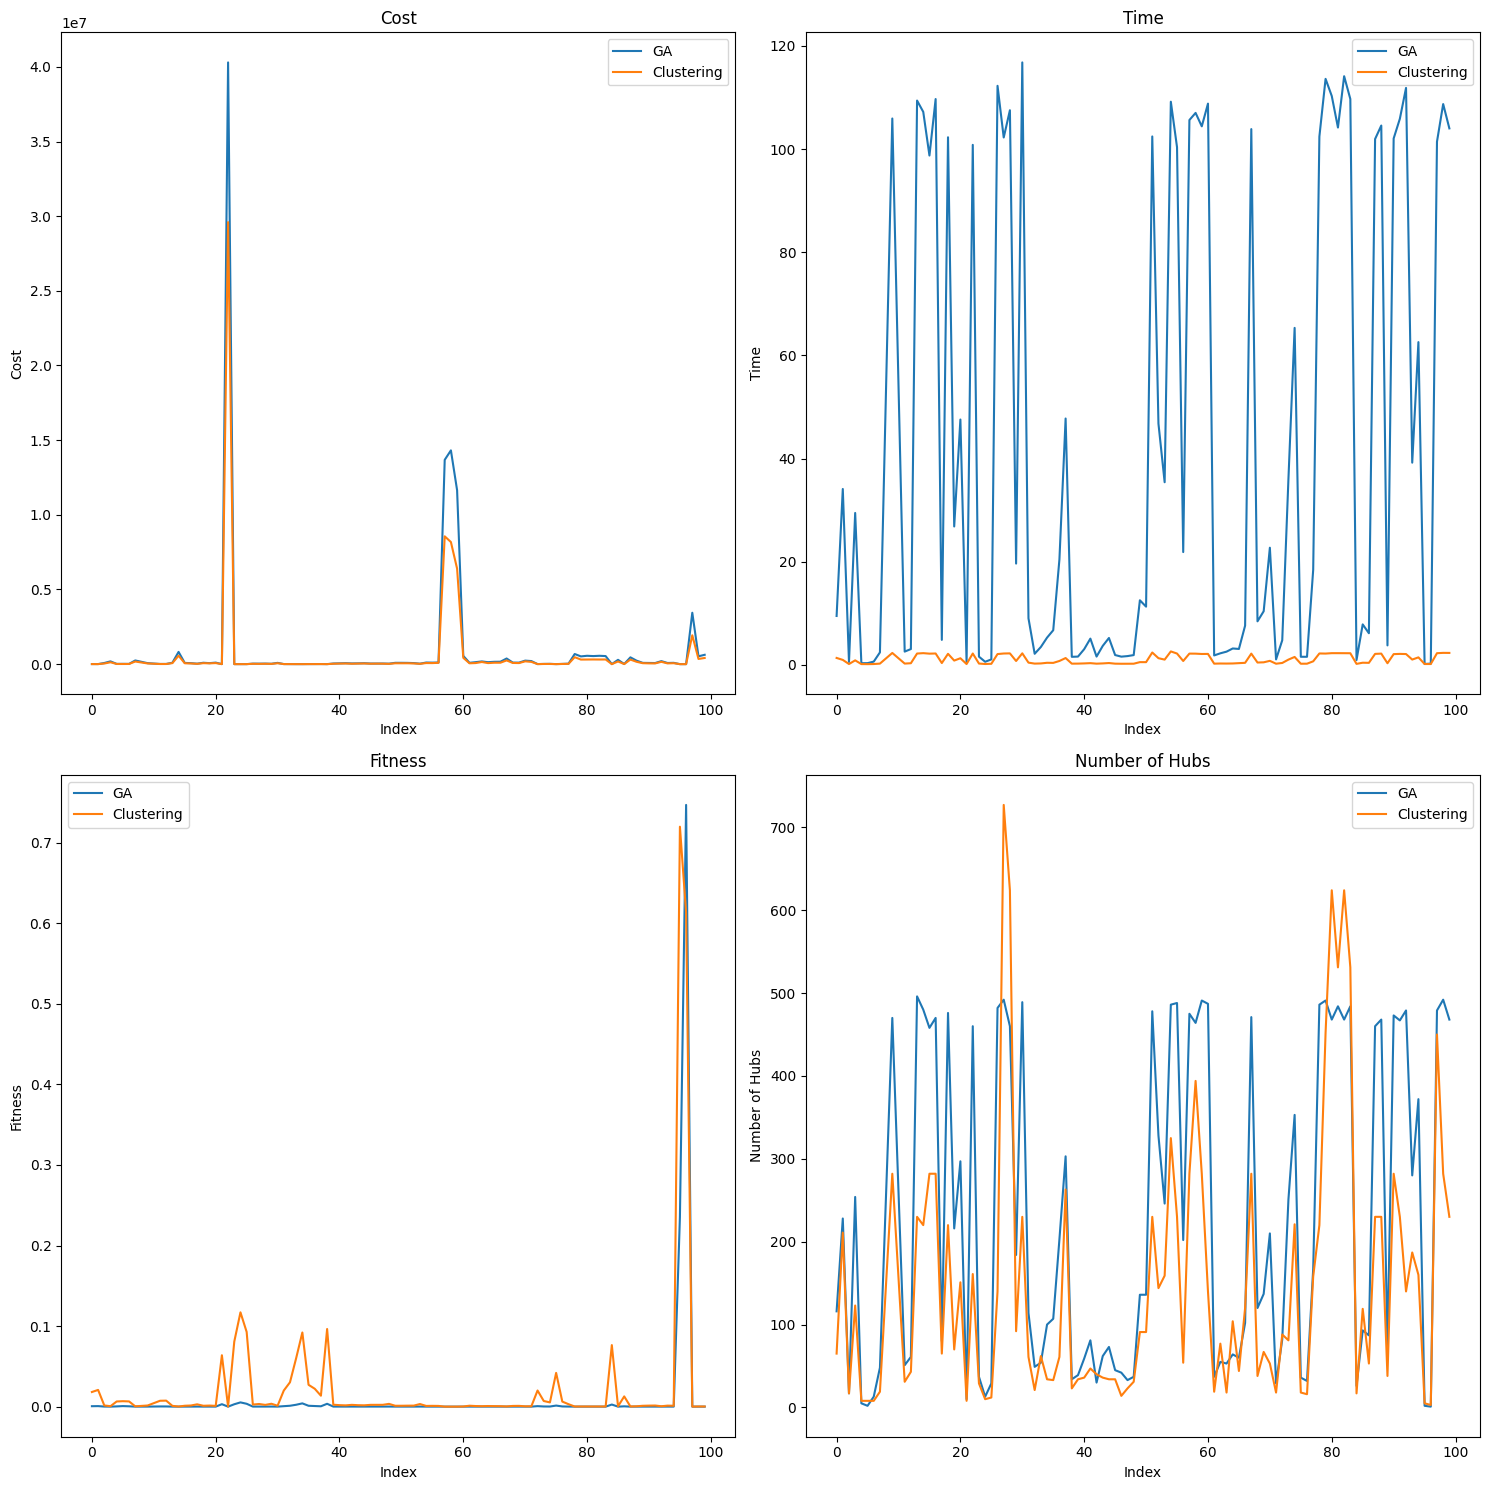

In [13]:
# plot a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
# plot cost for each index
axs[0, 0].plot(df_GA['i'], df_GA['cost'], label='GA')
axs[0, 0].plot(df_clustering['i'], df_clustering['cost'], label='Clustering')
axs[0, 0].set_title('Cost')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Cost')
axs[0, 0].legend()
# plot time for each index
axs[0, 1].plot(df_GA['i'], df_GA['time'], label='GA')
axs[0, 1].plot(df_clustering['i'], df_clustering['time'], label='Clustering')
axs[0, 1].set_title('Time')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('Time')
axs[0, 1].legend()
# plot fitness for each index
axs[1, 0].plot(df_GA['i'], df_GA['fitness'], label='GA')
axs[1, 0].plot(df_clustering['i'], df_clustering['fitness'], label='Clustering')
axs[1, 0].set_title('Fitness')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('Fitness')
axs[1, 0].legend()
# plot number of hubs for each index
axs[1, 1].plot(df_GA['i'], df_GA['no_of_hubs'], label='GA')
axs[1, 1].plot(df_clustering['i'], df_clustering['no_of_hubs'], label='Clustering')
axs[1, 1].set_title('Number of Hubs')
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_ylabel('Number of Hubs')
axs[1, 1].legend()
plt.tight_layout()
plt.savefig('benchmarks/plots.png')
plt.show()